# Trabalho 03 de identificação de sistemas - AB2-1

In [ ]:
import numpy as np
import math
import scipy.linalg as linalg
from abc import ABCMeta, abstractmethod
from itertools import chain, combinations_with_replacement
from typing import Any, List, Tuple, Union
import pandas as pd
from sklearn.metrics import mean_squared_error

# **GRÁFICOS DO SISTEMA 1**

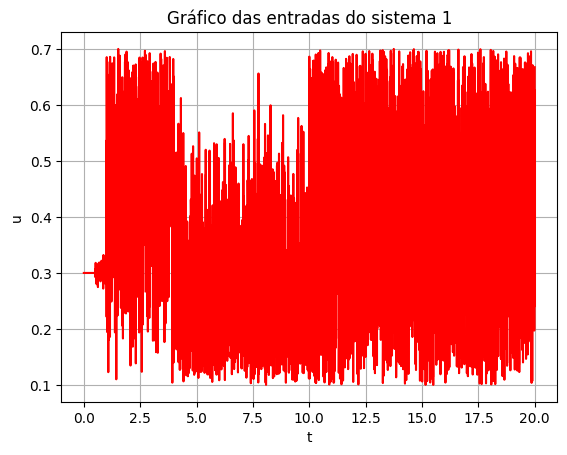

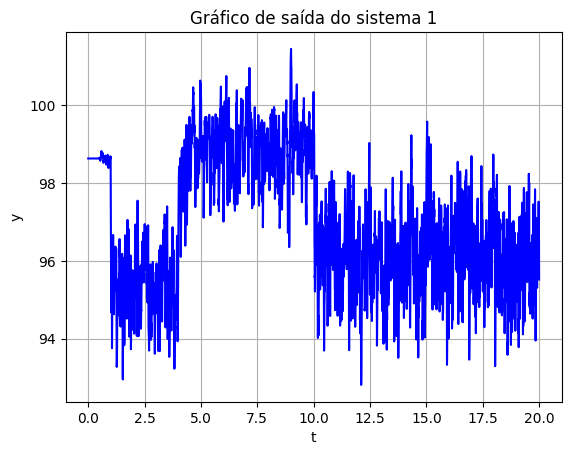

In [ ]:
import matplotlib.pyplot as plt

u_01 = []
y_01 = []


with open('exchanger.dat', 'r') as arquivo:
    linhas = arquivo.readlines()

    for linha in linhas:
        valores = linha.strip().split('\t')  # Divide a linha nos valores separados por tabulação

        valor1, valor2, valor3 = map(float, valores)  # Converte os valores para float (ou int, se forem inteiros)

        u_01.append(valor2)
        y_01.append(valor3)

t_01 = np.linspace(0, 20, len(u_01))

plt.figure(1)
plt.plot(t_01, u_01, label='u(t)', color = 'red')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Gráfico das entradas do sistema 1')
plt.grid(True)

plt.figure(2)
plt.plot(t_01, y_01, label='y(t)', color = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gráfico de saída do sistema 1')
plt.grid(True)
plt.show()

u_01 = np.reshape(u_01, (len(u_01),1))
y_01 = np.reshape(y_01 ,(len(y_01),1))

# **GRÁFICOS DO SISTEMA 2**

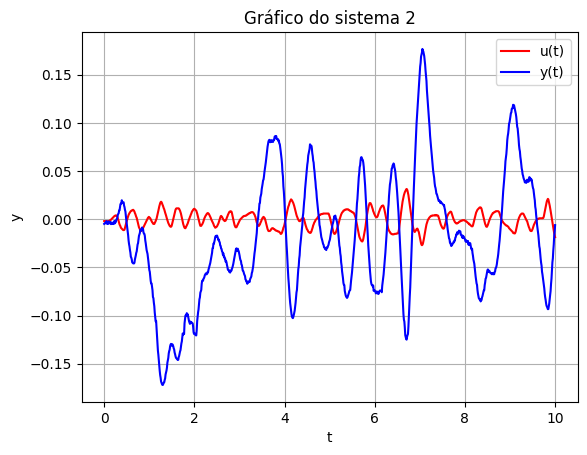

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

u_02 = []
y_02 = []

with open('ballbeam.dat', 'r') as arquivo:
    linhas = arquivo.readlines()

    for linha in linhas:
        valores = linha.strip().split('\t')  # Divide a linha nos valores separados por tabulação

        valor1, valor2 = map(float, valores)  # Converte os valores para float (ou int, se forem inteiros)

        y_02.append(valor2)
        u_02.append(valor1)

t_02 = np.linspace(0, 10, len(u_02))

plt.plot(t_02, u_02, label='u(t)', color = 'red')
plt.plot(t_02, y_02, label='y(t)', color = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gráfico do sistema 2')
plt.legend()
plt.grid(True)
plt.show()

u_02 = np.reshape(u_02, (len(u_02),1))
y_02 = np.reshape(y_02 ,(len(y_02),1))

# **GRÁFICOS DO SISTEMA 3**

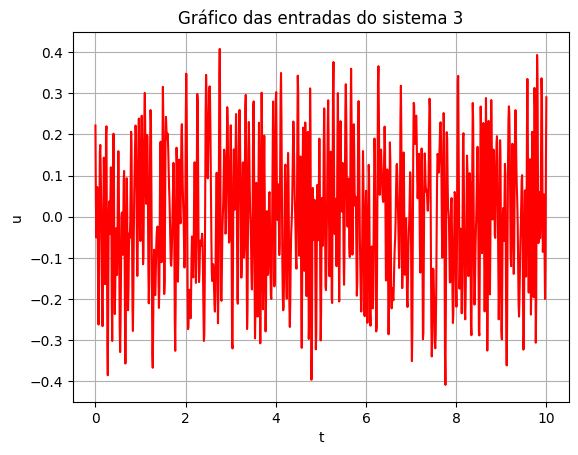

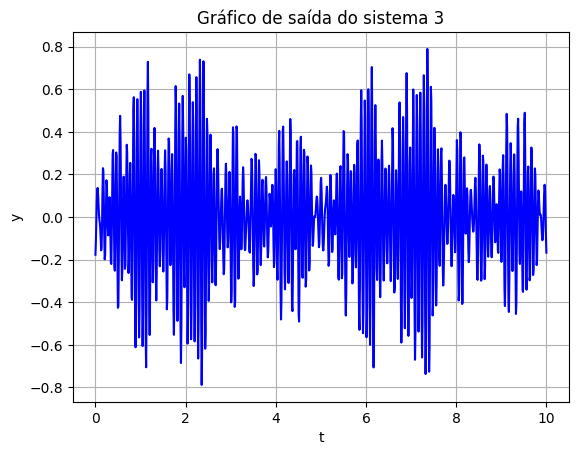

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tempo = np.linspace(0, 100, 1024) #intervalo de 0 a 100 com 1024 amostras no tempo
u_03 = []
y_03 = []

with open('robot_arm.dat', 'r') as arquivo:
    linhas = arquivo.readlines()

    for linha in linhas:
        valores = linha.strip().split('\t')  # Divide a linha nos valores separados por tabulação

        valor1, valor2 = map(float, valores)  # Converte os valores para float (ou int, se forem inteiros)

        y_03.append(valor2)
        u_03.append(valor1)

t_03 = np.linspace(0, 10, len(u_03))


plt.figure(1)
plt.plot(t_03, u_03, label='u(t)', color = 'red')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Gráfico das entradas do sistema 3')
plt.grid(True)

plt.figure(2)
plt.plot(t_03, y_03, label='y(t)', color = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gráfico de saída do sistema 3')
plt.grid(True)
plt.show()

u_03 = np.reshape(u_03, (len(u_03),1))
y_03 = np.reshape(y_03 ,(len(y_03),1))

# **GRÁFICOS DO SISTEMA 4**

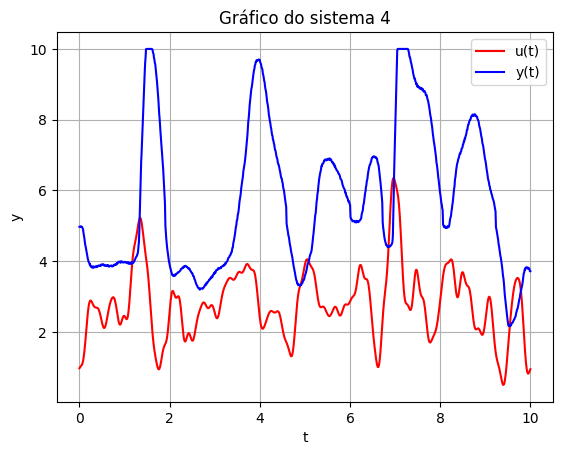

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


tanque = pd.read_csv('dataBenchmark.csv')

u_04 = tanque['uVal'].values
y_04 = tanque['yVal'].values

t_04 = np.linspace(0, 10, len(u_04))

plt.plot(t_04, u_04, label='u(t)', color = 'red')
plt.plot(t_04, y_04, label='y(t)', color = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gráfico do sistema 4')
plt.legend()
plt.grid(True)
plt.show()


u_04 = np.reshape(u_04, (len(u_04),1))
y_04 = np.reshape(y_04 ,(len(y_04),1))

# **GRÁFICOS DO SISTEMA 5**

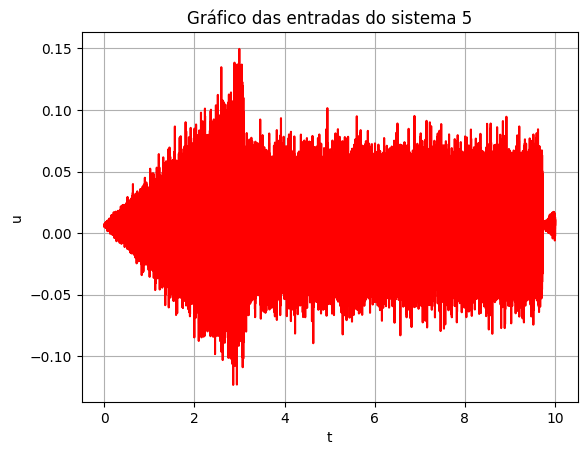

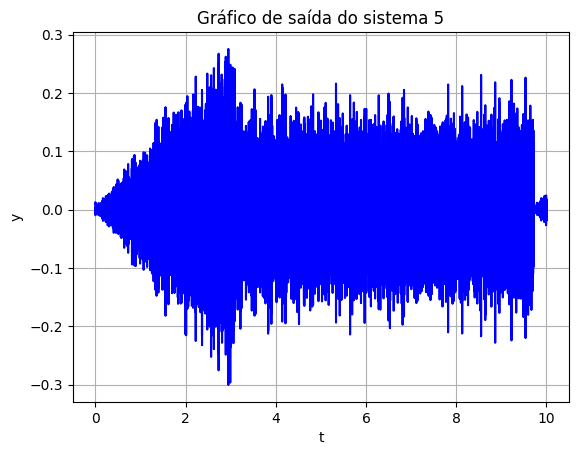

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


silver_box = pd.read_csv('SNLS80mV.csv')


u_05 = silver_box['V1'].values
y_05 = silver_box['V2'].values

t_05 = np.linspace(0, 10, len(u_05))

plt.figure(1)
plt.plot(t_05, u_05, label='u(t)', color = 'red')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Gráfico das entradas do sistema 5')
plt.grid(True)

plt.figure(2)
plt.plot(t_05, y_05, label='y(t)', color = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Gráfico de saída do sistema 5')
plt.grid(True)
plt.show()

u_05 = np.reshape(u_05, (len(u_05),1))
y_05 = np.reshape(y_05 ,(len(y_05),1))


# PSI

In [ ]:
def _num_features(X):
    return X.shape[1]

In [ ]:
class InformationMatrix:
    """Class for methods regarding preprocessing of columns"""

    def __init__(
        self,
        xlag: Union[List[Any], Any] = 1,
        ylag: Union[List[Any], Any] = 1,
    ) -> None:
        self.xlag = xlag
        self.ylag = ylag

    def shift_column(self, col_to_shift: np.ndarray, lag: int) -> np.ndarray:
        """Shift values based on a lag.

        Parameters
        ----------
        col_to_shift : array-like of shape = n_samples
            The samples of the input or output.
        lag : int
            The respective lag of the regressor.

        Returns
        -------
        tmp_column : array-like of shape = n_samples
            The shifted array of the input or output.

        Examples
        --------
        >>> y = [1, 2, 3, 4, 5]
        >>> shift_column(y, 1)
        [0, 1, 2, 3, 4]

        """
        n_samples = col_to_shift.shape[0]
        tmp_column = np.zeros((n_samples, 1))
        aux = col_to_shift[0 : n_samples - lag].reshape(-1, 1)
        tmp_column[lag:, 0] = aux[:, 0]
        return tmp_column

    def _process_xlag(self, X: np.ndarray) -> Tuple[int, List[int]]:
        """Create the list of lags to be used for the inputs

        Parameters
        ----------
        X : array-like
            Input data used on training phase.

        Returns
        -------
        x_lag : ndarray of int
            The range of lags according to user definition.

        """
        n_inputs = _num_features(X)
        if isinstance(self.xlag, int) and n_inputs > 1:
            raise ValueError(
                f"If n_inputs > 1, xlag must be a nested list. Got {self.xlag}"
            )

        if isinstance(self.xlag, int):
            xlag = list(range(1, self.xlag + 1))
        else:
            xlag = self.xlag

        return n_inputs, xlag

    def _process_ylag(self) -> List[int]:
        """Create the list of lags to be used for the outputs

        Returns
        -------
        y_lag : ndarray of int
            The range of lags according to user definition.

        """
        if isinstance(self.ylag, int):
            ylag = list(range(1, self.ylag + 1))
        else:
            ylag = self.ylag

        return ylag

    def _create_lagged_X(self, X: np.ndarray, n_inputs: int) -> np.ndarray:
        """Create a lagged matrix of inputs without combinations.

        Parameters
        ----------
        X : array-like
            Input data used on training phase.
        n_inputs : int
            Number of input variables.

        Returns
        -------
        x_lagged : ndarray of floats
            A lagged input matrix formed by the input regressors
            without combinations.

        """
        if n_inputs == 1:
            x_lagged = np.column_stack(
                [self.shift_column(X[:, 0], lag) for lag in self.xlag]
            )
        else:
            x_lagged = np.zeros([len(X), 1])  # just to stack other columns
            # if user input a nested list like [[1, 2], 4], the following
            # line convert it to [[1, 2], [4]].
            # Remember, for multiple inputs all lags must be entered explicitly
            xlag = [[i] if isinstance(i, int) else i for i in self.xlag]
            for col in range(n_inputs):
                x_lagged_col = np.column_stack(
                    [self.shift_column(X[:, col], lag) for lag in xlag[col]]
                )
                x_lagged = np.column_stack([x_lagged, x_lagged_col])

            x_lagged = x_lagged[:, 1:]  # remove the column of 0 created above

        return x_lagged

    def _create_lagged_y(self, y: np.ndarray) -> np.ndarray:
        """Create a lagged matrix of the output without combinations.

        Parameters
        ----------
        y : array-like
            Output data used on training phase.

        Returns
        -------
        y_lagged : ndarray of floats
            A lagged input matrix formed by the output regressors
            without combinations.

        """
        y_lagged = np.column_stack(
            [self.shift_column(y[:, 0], lag) for lag in self.ylag]
        )
        return y_lagged

    def initial_lagged_matrix(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Build a lagged matrix concerning each lag for each column.

        Parameters
        ----------
        y : array-like
            Target data used on training phase.
        X : array-like
            Input data used on training phase.

        Returns
        -------
        lagged_data : ndarray of floats
            The lagged matrix built in respect with each lag and column.

        Examples
        --------
        Let X and y be the input and output values of shape Nx1.
        If the chosen lags are 2 for both input and output
        the initial lagged matrix will be formed by Y[k-1], Y[k-2],
        X[k-1], and X[k-2].

        """
        n_inputs, self.xlag = self._process_xlag(X)
        self.ylag = self._process_ylag()
        x_lagged = self._create_lagged_X(X, n_inputs)
        y_lagged = self._create_lagged_y(y)
        lagged_data = np.concatenate([y_lagged, x_lagged], axis=1)
        return lagged_data

# PSI Não Linear

In [ ]:
class BaseBasisFunction(metaclass=ABCMeta):
    """Base class for Model Structure Selection"""

    @abstractmethod
    def __init__(self, degree: int = 1):
        self.degree = degree

    @abstractmethod
    def fit(
        self,
        data: np.ndarray,
        max_lag: int = 1,
        predefined_regressors: Union[np.ndarray, None] = None,
    ):
        """abstract method"""

    @abstractmethod
    def transform(
        self,
        data: np.ndarray,
        max_lag: int = 1,
        predefined_regressors: Union[np.ndarray, None] = None,
    ) -> np.ndarray:
        """abstract methods"""

In [ ]:
class Polynomial(BaseBasisFunction):
    r"""Build polynomial basis function.
    Generate a new feature matrix consisting of all polynomial combinations
    of the features with degree less than or equal to the specified degree.

    $$
        y_k = \sum_{i=1}^{p}\Theta_i \times \prod_{j=0}^{n_x}u_{k-j}^{b_i, j}
        \prod_{l=1}^{n_e}e_{k-l}^{d_i, l}\prod_{m=1}^{n_y}y_{k-m}^{a_i, m}
    $$

    where $p$ is the number of regressors, $\Theta_i$ are the
    model parameters, and $a_i, m, b_i, j$ and $d_i, l \in \mathbb{N}$
    are the exponents of the output, input and noise terms, respectively.

    Parameters
    ----------
    degree : int (max_degree), default=2
        The maximum degree of the polynomial features.

    Notes
    -----
    Be aware that the number of features in the output array scales
    significantly as the number of inputs, the max lag of the input and output, and
    degree increases. High degrees can cause overfitting.

    """

    def __init__(
        self,
        degree=2,
    ):
        self.degree = degree

    def fit(
        self,
        data: np.ndarray,
        max_lag: int = 1,
        predefined_regressors: Union[np.ndarray, None] = None,
    ):
        """Build the Polynomial information matrix.

        Each columns of the information matrix represents a candidate
        regressor. The set of candidate regressors are based on xlag,
        ylag, and degree defined by the user.

        Parameters
        ----------
        data : ndarray of floats
            The lagged matrix built with respect to each lag and column.
        max_lag : int
            Target data used on training phase.
        predefined_regressors : ndarray of int
            The index of the selected regressors by the Model Structure
            Selection algorithm.

        Returns
        -------
        psi = ndarray of floats
            The lagged matrix built in respect with each lag and column.

        """
        # Create combinations of all columns based on its index
        iterable_list = range(data.shape[1])
        #print("ITERABLE LIST ->", iterable_list)
        combinations = list(combinations_with_replacement(iterable_list, self.degree))
        #print("COMBINATIONS -> ", combinations)
        if predefined_regressors is not None:
            combinations = [combinations[index] for index in predefined_regressors]

        psi = np.column_stack(
            [
                np.prod(data[:, combinations[i]], axis=1)
                for i in range(len(combinations))
            ]
        )
        psi = psi[max_lag:, :]
        return psi

    def transform(
        self,
        data: np.ndarray,
        max_lag: int = 1,
        predefined_regressors: Union[np.ndarray, None] = None,
    ):
        return self.fit(data, max_lag, predefined_regressors)

In [ ]:
def generate_PSI(psi, l):
  for i in range(2, l+1):
    pol = Polynomial(i)
    psi_aux = pol.fit(psi, max_lag=2)

    if i == 2:
      PSI = np.hstack((psi[2:], psi_aux))
    else:
      PSI = np.hstack((PSI, psi_aux))

  return PSI

# Exemplo


In [ ]:
# Parâmetros do sistema
a1 = -0.605
a2 = -0.163
b1 = 0.588
b2 = -0.240

# Número de pontos de dados
n_points = 200

# Inicialize os vetores de entrada e saída
u = np.random.uniform(-1, 1, n_points)
y = np.zeros(n_points)

# Parâmetros
sigma_x = 0.1  # Desvio padrão

# Número de pontos de dados
n_points = 200

# Gerar ruído gaussiano branco
e = np.random.normal(0, sigma_x, n_points)

# Simulação do sistema
for k in range(2, n_points):
    y[k] = a1 * y[k-1] + a2 * y[k-2] + b1 * u[k-1] + b2 * u[k-2] + e[k]

In [ ]:
u = np.reshape(u, (200,1))
y = np.reshape(y, (200,1))

In [ ]:
inf_matrix = InformationMatrix(2, 2)
print(inf_matrix)

In [ ]:
psi = inf_matrix.initial_lagged_matrix(u, y)

In [ ]:
psi[2]

array([ 0.        ,  0.        ,  0.78825151, -0.78163727])

In [ ]:
PSI = generate_PSI(psi, 3)

In [ ]:
PSI.shape

(198, 34)

In [ ]:
PSI[1,:]

array([0.64829978, 0.        , 0.76616493, 0.78825151, 0.4202926 ,
       0.        , 0.49670455, 0.51102328, 0.        , 0.        ,
       0.        , 0.5870087 , 0.60393066, 0.62134044, 0.2724756 ,
       0.        , 0.32201345, 0.33129628, 0.        , 0.        ,
       0.        , 0.38055761, 0.39152811, 0.40281487, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.44974548, 0.46271049, 0.47604925, 0.48977254])

# Gera matrizresultado

In [ ]:
def MR(PSI,PSI_test ):
  theta_novo = np.linalg.inv(PSI.T @ PSI) @ PSI.T @ y_train[:-2]
  y_chapeu = PSI @ theta_novo
  y_chapeu_test = PSI_test @ theta_novo
  return y_chapeu,y_chapeu_test

# MSSE (Mean square simulation error)

In [ ]:
def MSSE(y, y_chapeu):
  se_ = np.power(y - y_chapeu, 2)
  mse = np.mean(se_)
  return mse

# SRR (Simulation error reduction ratio)

In [ ]:
def srr_(psi1, y): #psi1 = entrada com os regressores; y = entrada original
  psi1 = np.column_stack(psi1)
  theta = np.linalg.inv(psi1.T @ psi1) @ psi1.T @ y
  y_chapeu = psi1 @ theta
  e = y - y_chapeu
  indice = MSSE(y, y_chapeu)
  return indice


# SEMP (Simulation error minimization with pruning)

In [ ]:
# Simutaion error minimization with pruning


# Cria uma função com dois vetores, psiIN(inicialmente vazio) e psiOUT(Inicialmente cheio).
# Com J=MSSE(mi(psiIN)) testa-se o desempenho do modelo atual mi(psiIN). Vai adicioando em psiIN e testando o desempenho de cada regressor do conjunto psiOUT em psiIN. Se J atual - J anterior for melhor, o regressor é incluído, caso o contrário, o algoritmo para.
# Pruning: Mais uma vez, para cada regressor em PsiIN testa-se o desempenho sem ele. Se for pior ele fica, se for melhor, ele sai


def mi(psiIN, psiOUT, y,i):
  tup = (np.array(psiIN.copy()), psiOUT[:,i])
  vector = np.column_stack(tup)
  theta = np.linalg.inv(vector.T @ vector) @ vector.T @ y
  y_chapeu = vector @ theta
  e = y - y_chapeu
  return y_chapeu, vector

def SEMP(psiOUT, y):
  psiIN =  np.array([[]]) #Cria a matriz com os futuros candidatos inicialmente vazia
  indice_anterior_01 = 100000000 #necessário salvar o valor do índice anterior para que assim seja possível comparar com o mais atual
  psiIN = psiOUT[: ,0].copy() # inicia o psiIN com o primeiro regresso para que assim possa fazer a interação
  # print((1 / np.dot(psiIN.T, psiIN)) * psiIN.T)
  theta = (1 / np.dot(psiIN.T, psiIN)) * psiIN.T @ y
  y_chapeu = psiIN * theta
  indice_anterior_01 = MSSE(y, y_chapeu)
  # print(len(psiOUT))
  for i in range(1,psiOUT.shape[0]+1):
    # print(i)
    y_chapeu, vector = mi(psiIN,psiOUT,y,i) # Cria o y_chapeu e o vector
    indice = MSSE(y, y_chapeu) # testa a simulação atual com o srr e gera um indice
    if(indice < indice_anterior_01): # compara o indice anterior com o atual
      psiIN = vector.copy() # caso o indice atual seja melhor, ele é adicionado
      indice_anterior_01 = indice # indica o indice atual como indice_anterior_01 para atualizar o valor
    else:
      break


  # psiIN = np.reshape(psiIN, (len(psiIN),1))
  theta = np.linalg.inv(psiIN.T @ psiIN) @ psiIN.T @ y #gera o theta atual para simular
  y_chapeu = psiIN @ theta # gera o y_chapeu atual para simular
  indice_anterior_02 = MSSE(y, y_chapeu) #inicializa o indice anterior 02 para usar como referência para o pruning
  # print(psiIN.shape)
  variavel = psiIN.shape[1]
  while i < (variavel):
    # print(variavel,"---------------------")
    nova_lista = psiIN # gera uma nova lista com psiIN
    nova_lista = np.delete(nova_lista,i,1) # psiIN menos o índice atual a ser testado
    theta = np.linalg.inv(nova_lista.T @ nova_lista) @ nova_lista.T @ y  #gera theta
    y_chapeu = nova_lista @ theta
    # substituir pela MSSEcorrentropia
    indice = MSSE(y, y_chapeu) # testa a simulação atual com o srr e gera um indice
    print(i)
    if(indice < indice_anterior_02): # compara o indice anterior com o atual
      # print(i)
      psiIN = nova_lista # caso o indice atual seja melhor, o candidato é retirado
      indice_anterior_02 = indice # indica o indice atual como indice_anterior_02 para atualizar o valor
      variavel = variavel - 1
      # print(variavel)

  #plotando o resultado de treino
  # plt.plot(t_train[:-2], y_train[:-2], label="y")
  # plt.plot(t_train[:-2], y_chapeu, label="y_hat")
  # plt.title('Dataset de Treino')
  # plt.xlabel('t')
  # plt.ylabel('y')
  # plt.legend()
  # plt.show()

  # #plotando o resultado de teste
  # plt.plot(t_test[:-2], y_test, label="y_test")
  # plt.plot(t_test[:-2], y_chapeu_test, label="y_hat_test")
  # plt.title('Dataset de Teste')
  # plt.xlabel('t')
  # plt.ylabel('y')
  # plt.legend()
  # plt.show()

  # #plotando o erro do teste
  # plt.plot(t_test[:-2], (abs(y_test) - abs(y_chapeu_test)))
  # plt.title('Erro do dataset de Teste')
  # plt.xlabel('t')
  # plt.ylabel('erro')
  # plt.show()
  return psiIN



In [ ]:
Matriz_semp = InformationMatrix(2,3)
y_train, y_test = y_01[-50:], y_01[:-50]
u_train, u_test = u_01[-50:], u_01[:-50]
psi = Matriz_semp.initial_lagged_matrix(y_train, u_train)
psi2 = generate_PSI(psi, 3)
# print(psi2)
y_train = y_train[-48:]
u_train = u_train[-48:]

psiIN = SEMP(psi2, y_train)
psiIN2 = SEMP(psi2, u_train)

print(psiIN)

print("--------------------------")

print(psiIN2)

[[2.28897780e-01 5.37004160e-01 0.00000000e+00 ... 0.00000000e+00
  2.09348501e+03 2.08459966e+03]
 [4.85009710e-01 2.28897780e-01 5.37004160e-01 ... 2.49081929e+01
  4.41593717e+03 4.42589185e+03]
 [5.58224450e-01 4.85009710e-01 2.28897780e-01 ... 1.21923287e+01
  5.04239944e+03 5.06243286e+03]
 ...
 [6.27054450e-01 1.97133760e-01 3.98916950e-01 ... 2.43939111e+01
  5.85443741e+03 5.90865868e+03]
 [5.04197080e-01 6.27054450e-01 1.97133760e-01 ... 9.60398091e+00
  4.66471332e+03 4.68600339e+03]
 [2.40332440e-01 5.04197080e-01 6.27054450e-01 ... 1.44953920e+01
  2.23718701e+03 2.23033274e+03]]
--------------------------
[[2.28897780e-01 5.37004160e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.85009710e-01 2.28897780e-01 5.37004160e-01 ... 1.54857752e-01
  2.75163944e+01 2.75784236e+01]
 [5.58224450e-01 4.85009710e-01 2.28897780e-01 ... 1.19929146e-02
  4.97963324e+00 4.99941729e+00]
 ...
 [6.27054450e-01 1.97133760e-01 3.98916950e-01 ... 6.34815423e-02
  1.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def combine(arr, k):
    """
    Returns all possible combinations of k elements with repetition from arr.

    Parameters
    ----------
    arr : array_like
        Array of elements.
    k : int
        Number of elements to combine.

    Returns
    -------
    list
        List of all possible combinations of k elements from arr.
    """
    if k == 0:
        return [[]]
    elif not arr:
        return []
    else:
        head = arr[0]
        tail = arr[1:]

        without_head = combine(tail, k)
        with_head = combine(arr, k - 1)

        with_head = [[head] + x for x in with_head]

        return with_head + without_head


def generate_combinations(arr, size):
    """
    Returns all possible combinations of elements from arr up to length size.

    Parameters
    ----------
    arr : array_like
        Array of elements.
    size : int
        Maximum length of combinations.

    Returns
    -------
    list
        List of all possible combinations.
    """
    answer = []
    for k in range(1, size + 1):
        for comb in combine(arr, k):
            answer.append(comb)
    return answer


def plot_io(u, y, title):
    """
    Plots the input and output signals.

    Parameters
    ----------
    u : array_like
        Input signal.
    y : array_like
        Output signal.
    title : str
        Title of the plot.
    """
    plt.figure(figsize=(16, 9))
    plt.plot(u, label="u", color="k")
    plt.plot(y, label="y", color="r")
    plt.xlabel("timestep")
    plt.title(title)
    plt.legend()
    plt.grid(True)


def plot_y(y, y_pred, title):
    """
    Plots the output and predicted output signals.

    Parameters
    ----------
    y : array_like
        Output signal.
    y_pred : array_like
        Predicted output signal.
    title : str
        Title of the plot.
    """
    plt.figure(figsize=(16, 9))
    plt.plot(y, label="y", color="k", linestyle="--")
    plt.plot(y_pred, label="y_pred", color="r")
    plt.xlabel("timestep")
    plt.title(title)
    plt.legend()
    plt.grid(True)

In [ ]:
import numpy as np

def data_matrix(u, y, nu=1, ny=1, ne=0):
    """
    Computes the data matrix Ψ , given the input and output vector.

    Parameters
    ----------
    u : array_like
        Input vector.
    y : array_like
        Output vector.
    nu : int, optional
        Number of inputs. The default is 1.
    ny : int, optional
        Number of outputs. The default is 1.
    ne : int, optional
        Number of moving averages. The default is 0.

    Returns
    -------
    Ψ : array_like
        Data matrix consisting of nu + ny + ne columns.
    """
    N = len(u)
    n = max(nu, ny, ne)
    U = np.zeros((N-n, nu))
    Y = np.zeros((N-n, ny))

    for i in range(nu):
        U[:, -(i+1)] = u[i+1:N-n+i+1]

    for i in range(ny):
        Y[:, -(i+1)] = y[i+1:N-n+i+1]

    if ne == 0:
        return np.hstack((Y, U))

    E = np.zeros((N-n, ne))
    e = np.random.default_rng().random(len(u))

    for i in range(ne):
        E[:, -(i+1)] = e[i+1:N-n+i+1]

    return np.hstack((Y, U, E))

def get_model_term(idxs, nu, ny, ne=0):
    """
    Returns the model term corresponding to the given indices.

    Parameters
    ----------
    idxs : array_like
        Column indices of the data matrix.
    nu : int
        Number of inputs.
    ny : int
        Number of outputs.
    ne : int
        Number of moving averages.

    Returns
    -------
    str
        Model term corresponding to the given indices.
    """
    ans = ""
    for i in idxs:
        if i + 1 > ny+nu:
            ans += f" e[k-{nu+ny+ne-i}]"
        elif i + 1 > ny:
            ans += f" u[k-{nu+ny-i}]"
        else:
            ans += f" y[k-{ny-i}]"
    return ans.strip()


def candidate_matrix(dm, nl):
    """
    Returns the candidate matrix with all possible combinations of columns
    with degree of non linearity given by nl.

    Parameters
    ----------

    dm : array_like
        Data matrix.
    nl : int
        Degree of non linearity.

    Returns
    -------
    array_like
        Candidate matrix.
    list
        List of all possible combinations of columns.
    """

    combinations = generate_combinations(list(range(dm.shape[1])), nl)

    cm = []
    for comb in combinations:
        m = dm[:, comb]
        product = np.prod(m, axis=1)
        cm.append(product)

    return np.column_stack(cm), combinations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import sysid as sd

# from utils import plot_y


class Semp:
    def __init__(self, u, y, l, nu, ny, ne):
        self.u = u
        self.y = y
        self.nu = nu
        self.ny = ny
        self.ne = ne
        self.l = l
        self.t = np.arange(0, len(self.u) * 0.1, 0.1)
        self.limit = -max(self.nu, self.ny, self.ne)

    def __plot(self, t, y, y_hat, title, error):
        plot_y(y=y[: self.limit], y_pred=y_hat, title=title)
        print(f"MSE of the Model = {error}")
        print("=" * 30)

    def __msse(self, y, y_hat):
        squared_errors = np.power(y - y_hat, 2)
        mse = np.mean(squared_errors)

        return mse

    def __get_candidates(self, u_test, y_test, comb):
        data_matrix = sd.data_matrix(u_test, y_test, self.nu, self.ny, self.ne)
        cm_test = sd.candidate_matrix(data_matrix, self.l)
        candidates_test = np.array([])

        for i in range(len(cm_test[1])):
            if cm_test[1][i] in comb:
                if len(candidates_test) == 0:
                    candidates_test = cm_test[0][:, i]
                else:
                    candidates_test = np.column_stack(
                        (candidates_test, cm_test[0][:, i])
                    )

        return candidates_test

    def __prediction(self, psi_in, psi_out, y_train, i):
        tup = (np.array(psi_in.copy()), psi_out[:, i])
        aux = np.column_stack(tup) if i != 0 else psi_out[:, i].copy()
        iteractions = 1 if self.ne == 0 else self.ne - 1

        for j in range(iteractions):
            if i != 0:
                theta = np.linalg.inv(aux.T @ aux) @ aux.T @ y_train
                y_hat = aux @ theta
            else:
                theta = (1 / np.dot(aux.T, aux)) * aux.T @ y_train
                y_hat = aux * theta

            e = y_train - y_hat
            if self.ne != 0:
                psi_out[:, self.nu + self.ny + 1 + j] = e

        return y_hat, aux

    def __run_semp(self, data_matrix, y_train):
        y_train = y_train[: self.limit]
        psi_in = np.array([[]])
        comb_in = []
        psi_out, comb_out = sd.candidate_matrix(data_matrix, self.l)
        J = np.inf

        for i in range(psi_out.shape[1]):
            y_hat, aux = self.__prediction(psi_in, psi_out, y_train, i)

            Ji = self.__msse(y_train, y_hat)
            if Ji < J:
                J = Ji
                psi_in = aux.copy()
                comb_in.append(comb_out[i])

        theta = np.linalg.inv(psi_in.T @ psi_in) @ psi_in.T @ y_train
        y_hat = psi_in @ theta
        J = self.__msse(y_train, y_hat)

        i = 0
        while i < (psi_in.shape[1]):
            aux = psi_in.copy()
            aux = np.delete(aux, i, 1)
            theta = np.linalg.inv(aux.T @ aux) @ aux.T @ y_train
            y_hat = aux @ theta
            Ji = self.__msse(y_train, y_hat)
            if Ji < J:
                J = Ji
                psi_in = np.delete(psi_in, i, 1)
                comb_in.pop(i)
            else:
                i += 1

        return psi_in, comb_in

    def __run_train(self, u, y):
        data_matrix = sd.data_matrix(u, y, self.nu, self.ny, self.ne)
        psi, comb = self.__run_semp(data_matrix, y)

        theta = np.linalg.inv(psi.T @ psi) @ psi.T @ y[: self.limit]
        y_hat = psi @ theta

        return y_hat, theta, comb

    def __validate(self, title):
        n_train = int(0.2 * len(self.u))

        t_train, t_test = self.t[-n_train:], self.t[:-n_train]
        u_train, u_test = self.u[-n_train:], self.u[:-n_train]
        y_train, y_test = self.y[-n_train:], self.y[:-n_train]

        y_hat, theta, comb = self.__run_train(u_train, y_train)
        y_hat_test = self.__get_candidates(u_test, y_test, comb) @ theta

        self.__plot(
            t_train,
            y_train,
            y_hat,
            title + " - Train",
            self.__msse(y_train[: self.limit], y_hat),
        )
        self.__plot(
            t_test,
            y_test,
            y_hat_test,
            title + " - Validation",
            self.__msse(y_test[: self.limit], y_hat_test),
        )

        return y_hat, y_hat_test, theta, comb

    def run(self, validation=0, title=""):
        if validation:
            y_hat, y_hat_test, theta, comb = self.__validate(title)
            self.y_hat_test = y_hat_test

        else:
            y_hat, theta, comb = self.__run_train(self.u, self.y)
            self.__plot(
                self.t, self.y, y_hat, title, self.__msse(self.y[: self.limit], y_hat)
            )

        print("=" * 30)
        print(f"Non linear Regressors:")
        for i in range(len(comb)):
            print(sd.get_model_term(comb[i], self.nu, self.ny, self.ne))
        print("=" * 30)

        self.y_hat = y_hat
        self.theta = theta
        self.regressors = comb

In [ ]:
import numpy as np

# Simulação de dados de entrada (X) e saída (y)
X = np.random.rand(100, 3)  # Exemplo: 100 amostras e 3 regressores
y = np.random.rand(100)

# Inicialização de variáveis
max_iter = 100  # Número máximo de iterações
tolerance = 1e-4  # Tolerância para critério de parada
selected_regressors = []  # Regressores selecionados inicialmente

for iteration in range(max_iter):
    # Etapa 1: Treinar o modelo com regressores selecionados
    # Use um modelo de sua escolha (por exemplo, regressão linear)
    # model = srr_(y)

    # Etapa 2: Avaliar os regressores não selecionados
    unselected_regressors = [i for i in range(X.shape[1]) if i not in selected_regressors]

    best_regressor = None
    best_error = float("inf")

    for regressor in unselected_regressors:
        # Adicione temporariamente o regressor aos selecionados
        selected_regressors_temp = selected_regressors + [regressor]

        # Treine o modelo com os regressores temporários
        # model_temp = srr_(X[:, selected_regressors_temp], y)

        # Calcule o erro de simulação (por exemplo, erro quadrático médio)
        # error = srr_(y, model_temp.predict(X[:, selected_regressors_temp]))

        # Verifique se o erro atual é menor do que o melhor erro anterior
#         if error < best_error:
#             best_error = error
#             best_regressor = regressor

#     # Etapa 3: Critério de parada
#     if best_regressor is None or best_error >= tolerance:
#         break

#     # Etapa 4: Adicionar o melhor regressor aos selecionados
#     selected_regressors.append(best_regressor)

# # O resultado será a lista de índices dos regressores selecionados
# print("Regressores Selecionados:", selected_regressors)


# **GRAM-SCHMIDT**

In [ ]:
def GS(y, u, t):

  # n = 25% da amostra de dados
  n = int(0.25 * len(y))

  y_train, y_test = y[-n:], y[:-n]
  u_train, u_test = u[-n:], u[:-n]
  t_train, t_test = t[-n:], t[:-n]

  inf_matrix = InformationMatrix(2, 2)
  psi = inf_matrix.initial_lagged_matrix(u_train, y_train)
  PSI = generate_PSI(psi, 3)

  PSI_test = generate_PSI(inf_matrix.initial_lagged_matrix(u_test, y_test), 3)
  theta1 = np.linalg.inv(PSI.T @ PSI) @ PSI.T @ y_train[:-2]

  y_test = PSI_test @ theta1


  wi1 = []
  gi1 = []
  ERRi = []
  erri = []

  #calculando wi1
  for i in range(PSI.shape[1]):
    wi1.append(PSI[:, i])

  #calculando gi1
  for i in range(len(wi1)):
    gi1.append(wi1[i] @ y_train[:-2] / (wi1[i] @ wi1[i]))

  gi1 = [item for array in gi1 for item in array.tolist()]

  #calculando erri1
  for i in range(len(wi1)):
    ERRi.append(gi1[i]**2 * wi1[i] @ wi1[i] / (y_train[:-2].T @ y_train[:-2]))

  for meu_array in ERRi:
      erri.append(meu_array.item())

  max_index_h1 = [np.argmax(erri)]

  #criando a matriz W
  W = [wi1[max_index_h1[0]]]

  ##################################
  #GS
  for k in range(1, 10):
    ERRi = []

    for i in range(len(wi1)):
        if i not in max_index_h1:
            # Cálculo de alpha
            alpha = [(W[j] @ wi1[i]) / (W[j] @ W[j]) for j in range(k)]

            # Cálculo de wki
            wki = wi1[i] - sum([alpha[j] * W[j] for j in range(k)])

            # Cálculo de gki
            gki = wki @ y_train[:-2] / (wki @ wki)

            # Cálculo de ERRi
            ERRi.append(gki**2 * wki @ wki / (y_train[:-2].T @ y_train[:-2]))
        else:
            ERRi.append(0)

    # Adicionando o índice com o maior ERRi à lista 'max_index_h1'
    max_index_h1.append(np.argmax(ERRi))

    # Adicionando wi1[max_index_h1[k]] a lista 'W'
    W.append(wi1[max_index_h1[k]])

  ##################################

  psi_novo = PSI[:, max_index_h1]
  theta_novo = np.linalg.inv(psi_novo.T @ psi_novo) @ psi_novo.T @ y_train[:-2]
  y_chapeu = psi_novo @ theta_novo
  y_chapeu_test = PSI_test[:, max_index_h1] @ theta_novo


  #plotando o resultado de treino
  plt.plot(t_train[:-2], y_train[:-2], label="y")
  plt.plot(t_train[:-2], y_chapeu, label="y_hat")
  plt.title('Dataset de Treino')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.legend()
  plt.show()

  #plotando o resultado de teste
  plt.plot(t_test[:-2], y_test, label="y_test")
  plt.plot(t_test[:-2], y_chapeu_test, label="y_hat_test")
  plt.title('Dataset de Teste')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.legend()
  plt.show()

  #plotando o erro do teste
  plt.plot(t_test[:-2], (abs(y_test) - abs(y_chapeu_test)))
  plt.title('Erro do dataset de Teste')
  plt.xlabel('t')
  plt.ylabel('erro')
  plt.show()

## ARQUIVO 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


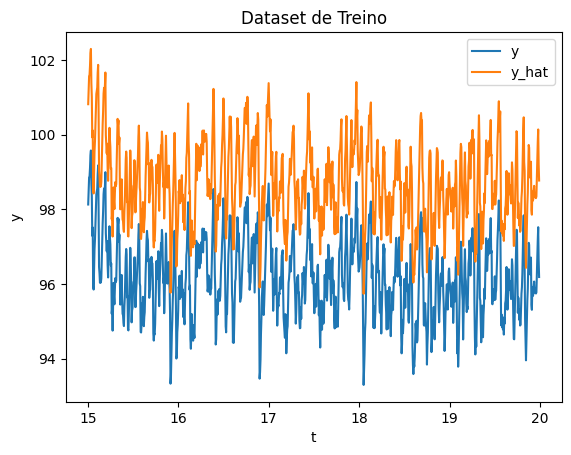

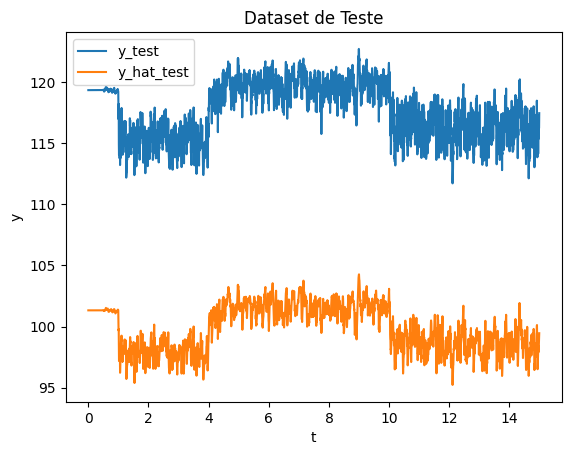

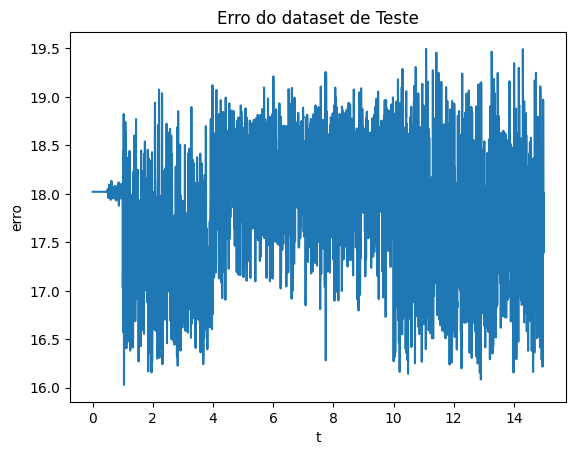

In [ ]:
GS(y_01, u_01, t_01)

## ARQUIVO 2

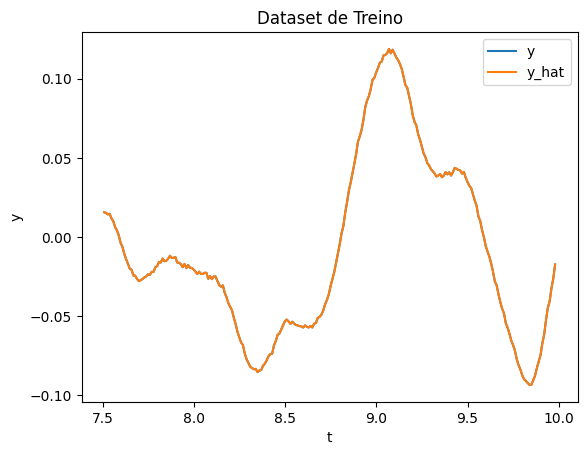

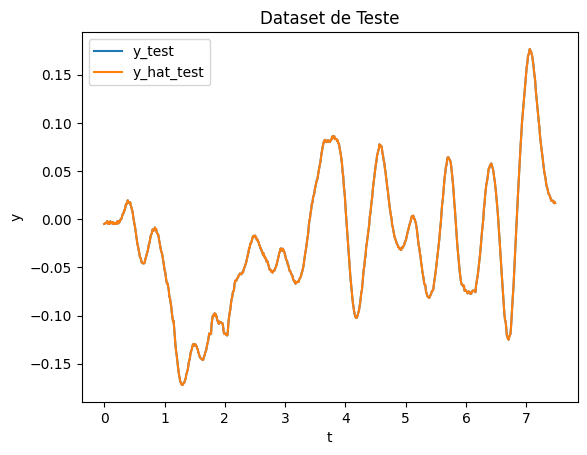

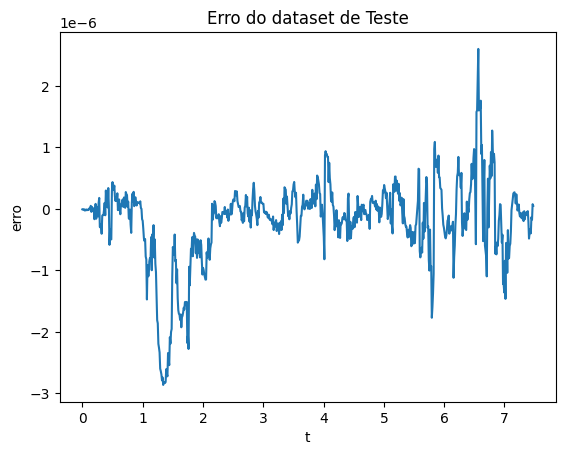

In [ ]:
GS(y_02, u_02, t_02)

## ARQUIVO 3

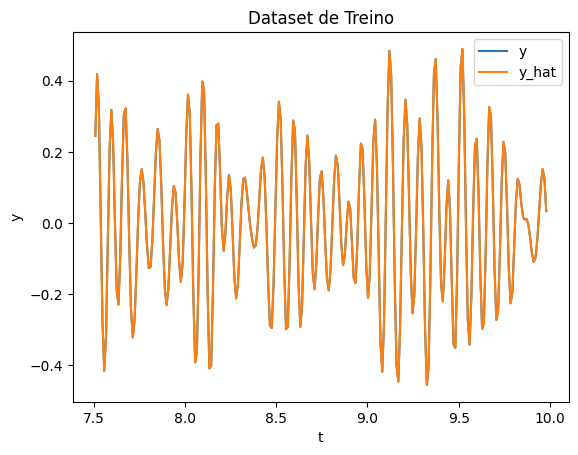

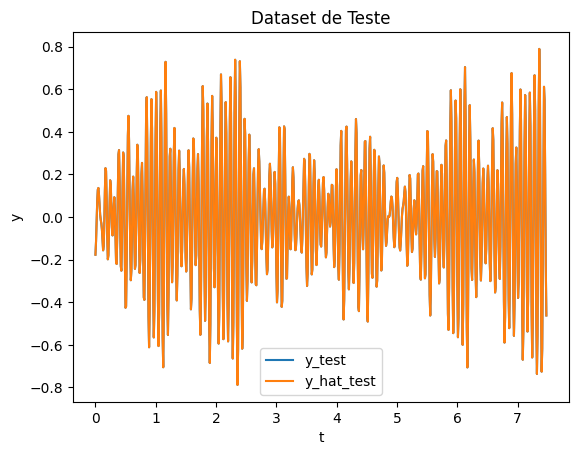

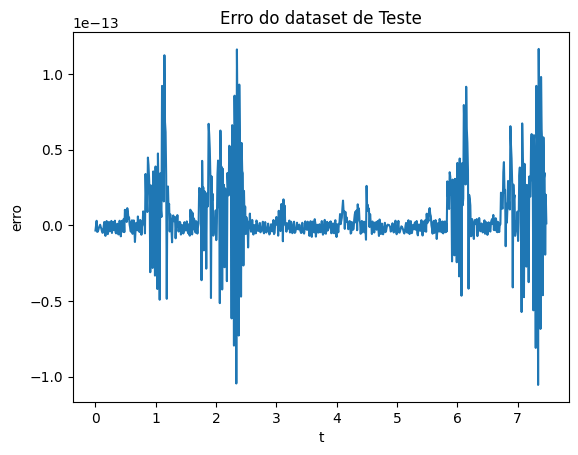

In [ ]:
GS(y_03, u_03, t_03)

## ARQUIVO 4

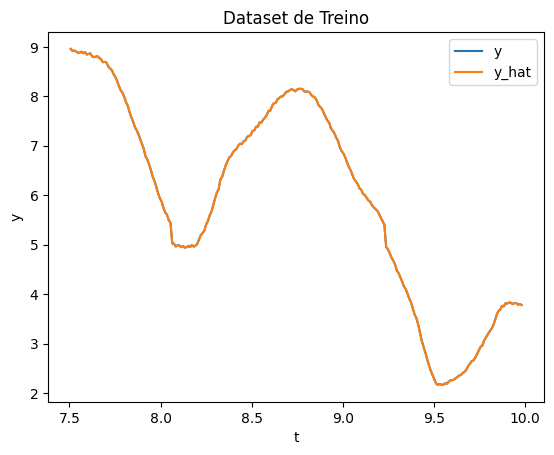

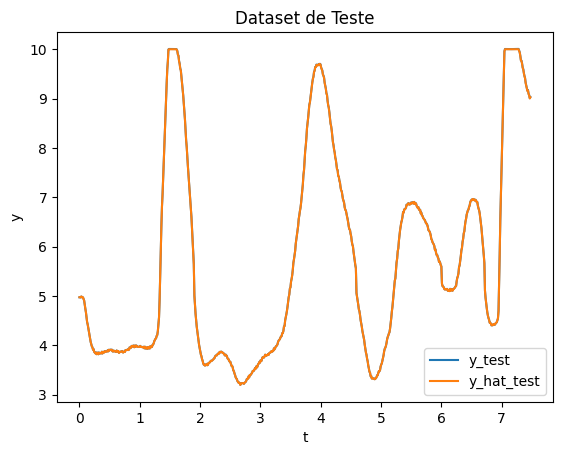

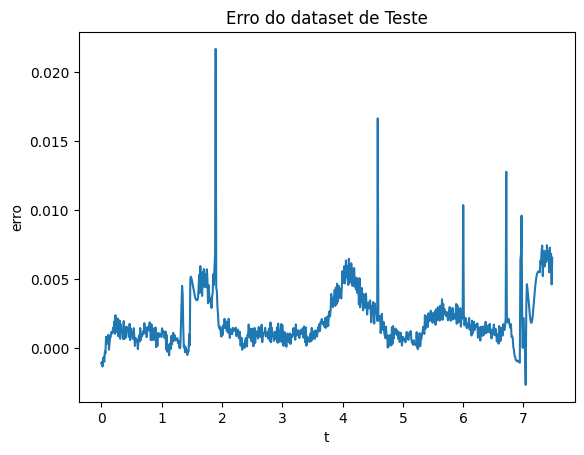

In [ ]:
GS(y_04, u_04, t_04)

## ARQUIVO 5

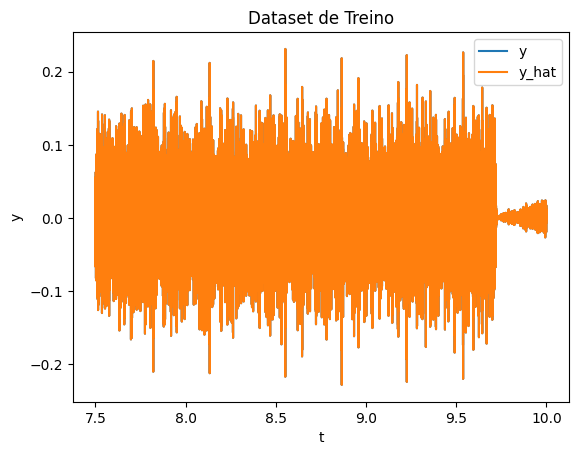

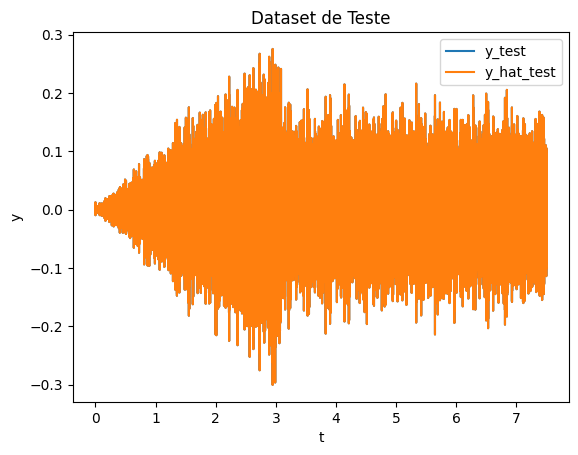

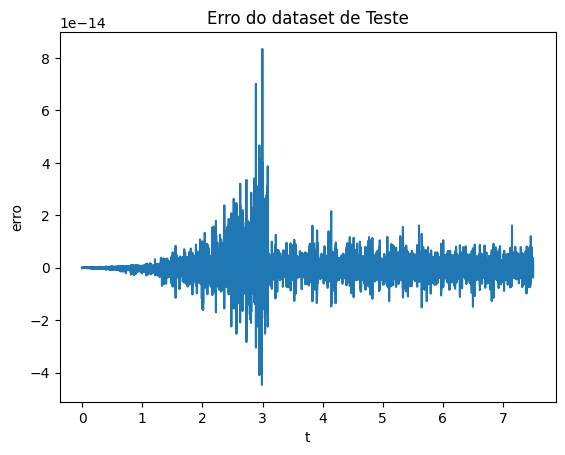

In [ ]:
GS(y_05, u_05, t_05)

# **FROLS (Forward Orthogonal Least Squares)**

In [ ]:
def inner_product_ratio(Y, Q):
  return np.dot(Y.T, Q)/np.dot(Q.T, Q)

def proj(u, v):
  return np.dot(u.T,v)/np.dot(u.T,u)*u

def calc_g(Q, Y):
  n_params = Q.shape[1]
  g = np.full((n_params,1),np.nan)

  for i_param in range(n_params):
      g[i_param]=inner_product_ratio(Y, Q[:,i_param])

  return g


def calc_err(g, Q, Y):
  sigma = np.dot(Y.T,Y)
  n_params = Q.shape[1]
  err = np.full_like(g,np.nan)

  for i_param in range(n_params):
      err[i_param]=g[i_param]**2*np.dot(Q[:,i_param].T,Q[:,i_param])/sigma

  return err

def calc_esr(err):
  return 1-np.sum(err.flatten())

def orthogonalize(P):
  (Q,R) = np.linalg.qr(P,mode='reduced')
  return Q

def remove_B_columns_from_A(A, B):
    n_params = A.shape[1]
    n_cols = B.shape[1]
    A_new = A.copy()

    for i_param in range(n_params):
        for i_col in range(n_cols):
            A_new[:,i_param] -= proj(B[:,i_col],A[:,i_param])

    return A_new

def solve_triangular(A,B):
    """
    Solve Ax = B for x when A is upper triangular, and has unit diagonal
    """
    x = linalg.solve_triangular(A,B,unit_diagonal=True)

    return x

def calc_M(nu, ny, l):
  n = nu + ny
  return math.factorial(n + l)/(math.factorial(n)*math.factorial(l))

In [ ]:
def frols(U, Y, nu, ny, l, pcols=None, term_thresh=1.0e-3, max_steps=1000):


    n = int(0.25 * Y.shape[0])

    y_train, y_test = Y[-n:], Y[:-n]
    u_train, u_test = U[-n:], U[:-n]
    inf_matrix = InformationMatrix(nu, ny)

    # Train
    psi_train = inf_matrix.initial_lagged_matrix(u_train, y_train) # Array with regressors
    PSI_train = generate_PSI(psi_train, l) # Array of regressors non-linear

    # Test
    psi_test = inf_matrix.initial_lagged_matrix(u_test, y_test)
    PSI_test = generate_PSI(psi_test, l)


    # Matrix
    P = PSI.copy()
    M = calc_M(nu, ny, l) # Calculate the maximum number of candidates
    Y = Y[2:]

    l_list = [] # List of indicies (columns of P) which have been selected for model
    g_list = [] # List of coefficients to retained from each step (i.e. for step s g^s[:,l_s])
    Q_list = [] # List of columns of step-specific orthogonal matrix Q columns to retain (i.e. Q^s[:,l_s])
    err_list = [] #List of step-specific error reducing ratios to retain (ERR^s[:,l_s])

    if pcols is None:
        pcols = {i:'x%d' % (i+1) for i in range(P.shape[1])}

    #Mask
    selected = np.zeros((P.shape[1],), dtype=bool)
    esr = 1.
    i_step = 0

    #while esr > term_thresh and i_step < P.shape[1]:
    while esr > term_thresh and i_step < M-1:
        selected[l_list] = True
        unselected = np.logical_not(selected)
        unselected_inds = np.flatnonzero(unselected)
        print("Not selected %s" % (str(unselected_inds)))

        if i_step==0:
            print("Step {}".format(i_step))
            Q = P.copy()
            g = calc_g(Q,Y)
            err = calc_err(g, Q, Y)
            l = np.argmax(err)
            l_list.append(l)
            g_list.append(g[l])
            Q_list.append(Q[:, l])
            err_list.append(err[l])

        else:
            print("Step {}".format(i_step))
            print("Shape of P = %s" % (str(P[:, unselected].shape)))
            Q = orthogonalize(P[:, selected])
            thisQ = remove_B_columns_from_A(P[:, unselected], Q)
            g = calc_g(thisQ, Y)
            err = calc_err(g, thisQ, Y)
            thisl = np.argmax(err)
            l = unselected_inds[thisl]
            l_list.append(l)
            g_list.append(g[thisl])
            Q_list.append(thisQ[:, thisl])
            err_list.append(err[thisl])

        esr = calc_esr(np.array(err_list))
        print("Step %d: Selected term at index %d (%s), ERR=%f, ESR=%f" % (i_step, l_list[-1], pcols[l_list[-1]], err_list[-1],esr))
        i_step+=1

    #Finally put together the final coefficients
    model_str = []
    Q_f = np.column_stack(Q_list)
    g_f = np.array(g_list).reshape(-1, 1)
    err_f = np.array(err_list).reshape(-1, 1)
    n_identified = Q_f.shape[1]
    A = np.eye(n_identified)
    Pl = P[:, l_list]

    #Fill in upper triangluar part of A
    for s in range(n_identified):
        for r in range(s):
            if r == s:
                A[r,s] = 1.
            else:
                A[r,s] = np.dot(Q_f[:, r].T, Pl[:, s])/np.dot(Q_f[:, r].T, Q_f[:, r])

    coef = solve_triangular(A, g_f)
    pred_Y = np.dot(Pl, coef)

    modelstr = '+'.join(['%.9f*%s' % (coef[k], pcols[l_list[k]]) for k in range(n_identified)])
    print("Using model: %s\n RMSE is %f" % (modelstr, np.sqrt(np.mean((Y - pred_Y)**2))) )

    full_coef = np.zeros((P.shape[1], 1))
    full_err = np.zeros((P.shape[1], 1))
    full_coef[l_list] = coef
    full_err[l_list] = err_f

    return full_coef, full_err, pred_Y

In [ ]:
def get_data_time_I_O(filename):
  tempo = []
  u = []
  y = []

  with open(filename, 'r') as arquivo:
      linhas = arquivo.readlines()

      for linha in linhas:
          valores = linha.strip().split('\t')  # Divide a linha nos valores separados por tabulação

          valor1, valor2, valor3 = map(float, valores)  # Converte os valores para float (ou int, se forem inteiros)

          tempo.append(valor1)  # Adiciona o valor à lista correspondente
          u.append(valor2)
          y.append(valor3)

  u = np.array(u)
  y = np.array(y)

  u = np.reshape(u, (u.shape[0], 1))
  y = np.reshape(y, (y.shape[0], 1))

  return u, y

In [ ]:
def get_data_I_O(filename):
  u = []
  y = []

  with open(filename, 'r') as arquivo:
      linhas = arquivo.readlines()

      for linha in linhas:
          valores = linha.strip().split('\t')  # Divide a linha nos valores separados por tabulação

          valor1, valor2 = map(float, valores)  # Converte os valores para float (ou int, se forem inteiros)

          u.append(valor1)
          y.append(valor2)

  u = np.array(u)
  y = np.array(y)

  u = np.reshape(u, (u.shape[0], 1))
  y = np.reshape(y, (y.shape[0], 1))

  return u, y

In [ ]:
def plot_FROLS_result():

  #plotando o resultado de treino
  plt.plot(t_train[:-2], y_train[:-2], label="y")
  plt.plot(t_train[:-2], y_chapeu, label="y_hat")
  plt.title('Dataset de Treino')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.legend()
  plt.show()

  #plotando o resultado de teste
  plt.plot(t_test[:-2], y_test, label="y_test")
  plt.plot(t_test[:-2], y_chapeu_test, label="y_hat_test")
  plt.title('Dataset de Teste')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.legend()
  plt.show()

  #plotando o erro do teste
  plt.plot(t_test[:-2], (abs(y_test) - abs(y_chapeu_test)))
  plt.title('Erro do dataset de Teste')
  plt.xlabel('t')
  plt.ylabel('erro')
  plt.show()

## FROLS DATA 1

In [ ]:
u_01, y_01 = get_data_time_I_O('exchanger.dat')

In [ ]:
coefs, err, y_hat = frols(u_01, y_01, nu=2, ny=2, l=3)

Not selected [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Step 0
Step 0: Selected term at index 0 (x1), ERR=0.999979, ESR=0.000021
Using model: 0.999981417*x1
 RMSE is 0.445590


## FROLS DATA 2

In [ ]:
u_02, y_02 = get_data_I_O('ballbeam.dat')

In [ ]:
coefs, err, y_hat = frols(u_02, y_02, nu=2, ny=2, l=3)

Not selected [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Step 0
Step 0: Selected term at index 0 (x1), ERR=0.996319, ESR=0.003681
Not selected [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
Step 1
Shape of P = (998, 33)
Step 1: Selected term at index 1 (x2), ERR=0.002658, ESR=0.001023
Not selected [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]
Step 2
Shape of P = (998, 32)
Step 2: Selected term at index 3 (x4), ERR=0.000016, ESR=0.001007
Not selected [ 2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33]
Step 3
Shape of P = (998, 31)
Step 3: Selected term at index 2 (x3), ERR=0.000075, ESR=0.000933
Using model: 1.715775195*x1+-0.716217840*x2+0.668217559*x4+-0.640425041*x3
 RMSE is 0.002118


## FROLS DATA 3

In [ ]:
u_03, y_03 = get_data_I_O('robot_arm.dat')

In [ ]:
coefs, err, y_hat = frols(u_03, y_03, nu=2, ny=2, l=3)

Not selected [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Step 0
Step 0: Selected term at index 0 (x1), ERR=0.516468, ESR=0.483532
Not selected [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
Step 1
Shape of P = (1022, 33)
Step 1: Selected term at index 1 (x2), ERR=0.471319, ESR=0.012213
Not selected [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]
Step 2
Shape of P = (1022, 32)
Step 2: Selected term at index 2 (x3), ERR=0.003513, ESR=0.008701
Not selected [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33]
Step 3
Shape of P = (1022, 31)
Step 3: Selected term at index 33 (x34), ERR=0.000108, ESR=0.008593
Not selected [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]
Step 4
Shape of P = (1022, 30)
Step 4: Selected term at index 3 (x4), ERR=

## FROLS DATA 4

## FROLS DATA 5